# Departure Delays by Weekday, Time of Day, and Airline

## Investigation Overview

In this investigation, I wanted to look at the average flight delays with regards to the day of the week, the time of the scheduled departure, and the specific airline.

## Dataset Overview

This document explores a dataset containing information of over 7,000,000 flights in the United States, including carriers, arrival, departure delays, and reasons for delays in 2008.  I have also merged an additional dataset to get the specific airline for each flight.  I decided to concentrate on the airline, departure delay, the day of the flight, and the scheduled time of departure.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
# Load datasets into a pandas dataframe
flights = pd.read_csv('flights.csv')
flights_delay = pd.read_csv('flights_delay.csv')
top_airlines = pd.read_csv('top_airlines.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

## Average Departure Delay by Weekday for All Flights

The average departure delay for all flights in 2008 was the longest for Friday and then Sunday.  I can assume that is a result of the start of weekend travels.  Wednesday, Saturday, and then Tuesday were had the shortest departure delays.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


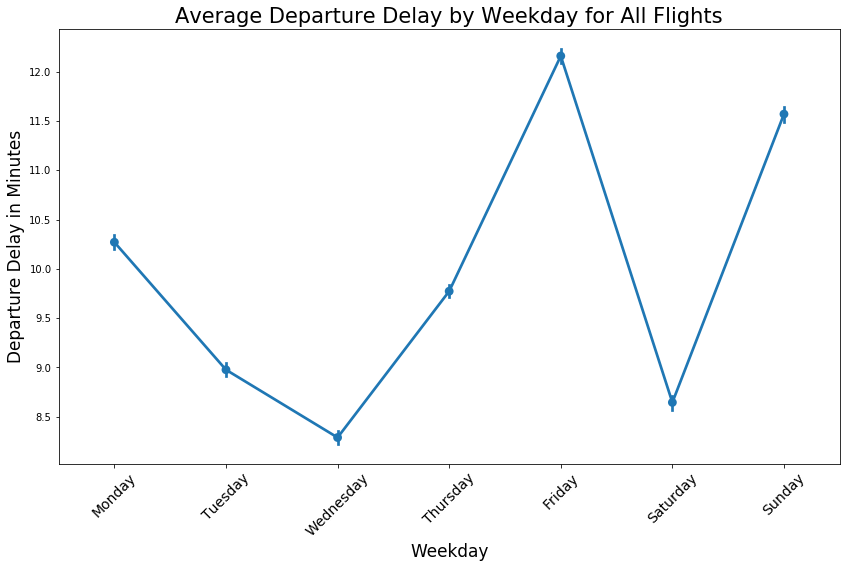

In [4]:
fig = plt.gcf();
fig.set_size_inches(14, 8);
sb.pointplot(data = flights, x = 'Weekday', y= 'DepDelay', linestyles = "-", order = weekday_order);
plt.xticks(rotation = 45, fontsize = 14);
plt.xlabel('Weekday', fontsize = 17);
plt.ylabel('Departure Delay in Minutes', fontsize = 17);
plt.title('Average Departure Delay by Weekday for All Flights', fontsize = 21);

## Average Departure Delay by Weekday for All Flights by Airlines

Airlines tend to remain constant in their average departure delay meaning that their individual weekday average departure delays do not deviate on any given day.  Aloha Airlines and Hawaiian Airlines are significantly lower than the remaining 18 airlines.  

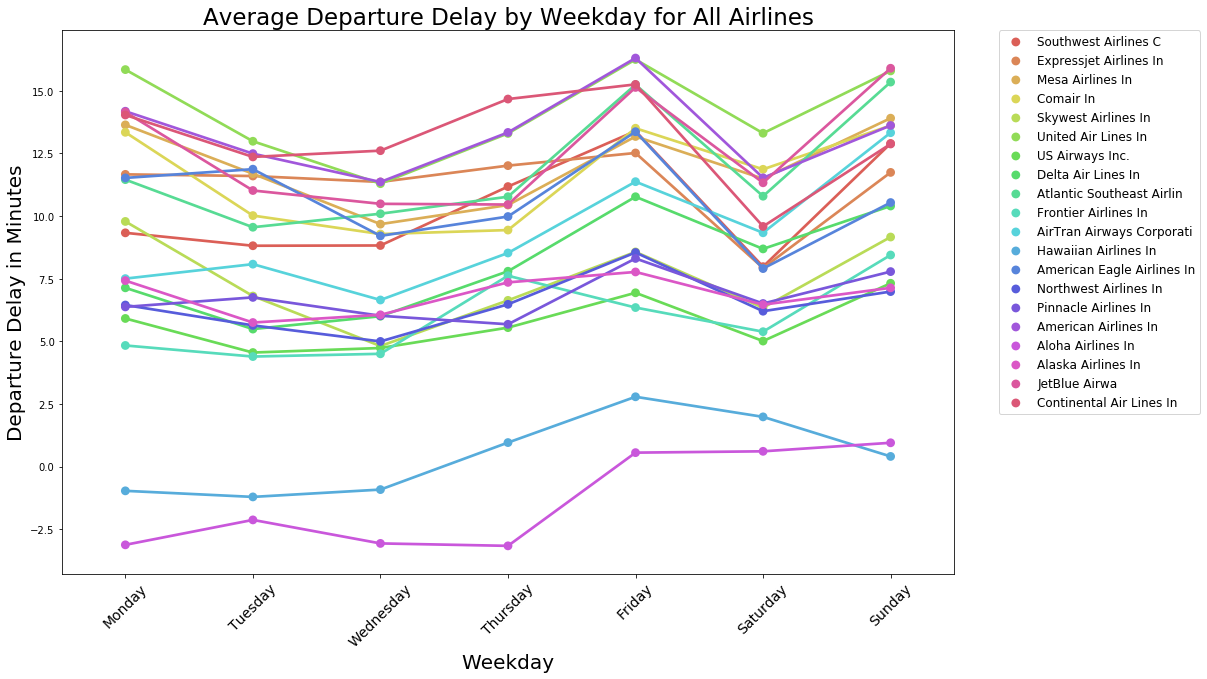

In [5]:
sb.set_palette(sb.color_palette("hls", 20));
fig = plt.gcf();
fig.set_size_inches( 16, 10);
sb.pointplot(data = flights, x = 'Weekday', y= 'DepDelay', hue = 'Airline', linestyles = "-", order = weekday_order, ci = None);
plt.xticks(rotation = 45, fontsize = 14);
plt.xlabel('Weekday', fontsize = 20);
plt.ylabel('Departure Delay in Minutes', fontsize = 20);
plt.title('Average Departure Delay by Weekday for All Airlines', fontsize = 23);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 12);

## Average Departure Delay by Weekday for top 5 Busiest Airlines

The top 5 airlines tend to follow the same pattern that all flights do, however, it is not always the case.  For example, Skywest Airlines and US Airways experience longer average departure delays on Monday and Sunday respectively.  If someone is to fly one of these major airlines, I would suggest flying on a Wednesday or a Saturday to ensure the shortest delay possible.

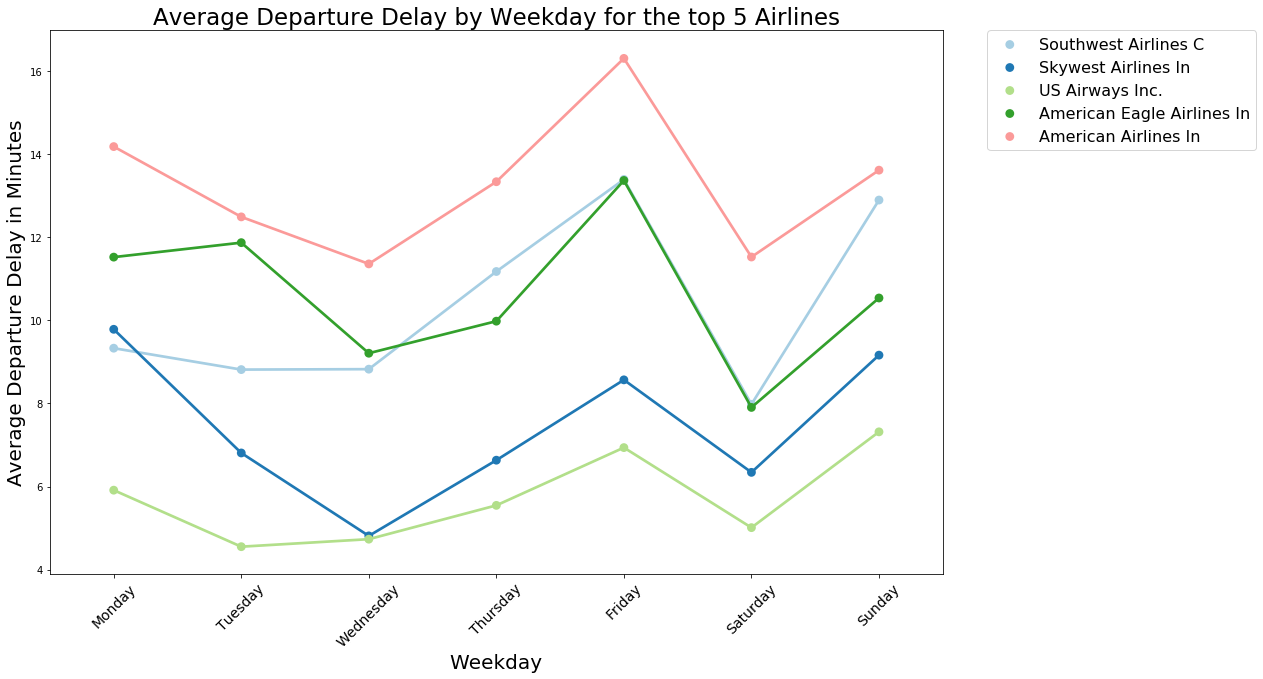

In [6]:
sb.set_palette(sb.color_palette("Paired", 5));
fig = plt.gcf();
fig.set_size_inches( 16, 10);
sb.pointplot(data = top_airlines, x = 'Weekday', y= 'DepDelay', hue = 'Airline', linestyles = "-", order = weekday_order,
            ci = None);
plt.xticks(rotation = 45, fontsize = 14);
plt.xlabel('Weekday', fontsize = 20);
plt.ylabel('Average Departure Delay in Minutes', fontsize = 20);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16);
plt.title('Average Departure Delay by Weekday for the top 5 Airlines', fontsize = 23);

In [7]:
#Convert CRSDepTime to String then splice off minutes to get hour of scheduled flight
flights['CRSDepTime'] = flights['CRSDepTime'].astype(str)
flights.CRSDepTime = flights.CRSDepTime.str[:-2]

In [8]:
#Drop rows that have a null value
flights = flights[flights['CRSDepTime'].notnull()]

## Average Departure Delay by Scheduled Hour of Departure for All Flights

The average departure delay for all flights has a spike in the early morning hours with over ten minutes from 3 to 4 am., and then consistently increases until it tops out around 17 minutes around 8 to 9 pm.  It can be reasonably concluded that to avoid the chances of a longer delay, one should schedule a flight earlier in the morning from like 6 to 9 am.  This may be a result from planes being delayed throughout the day and flights constantly being pushed back.

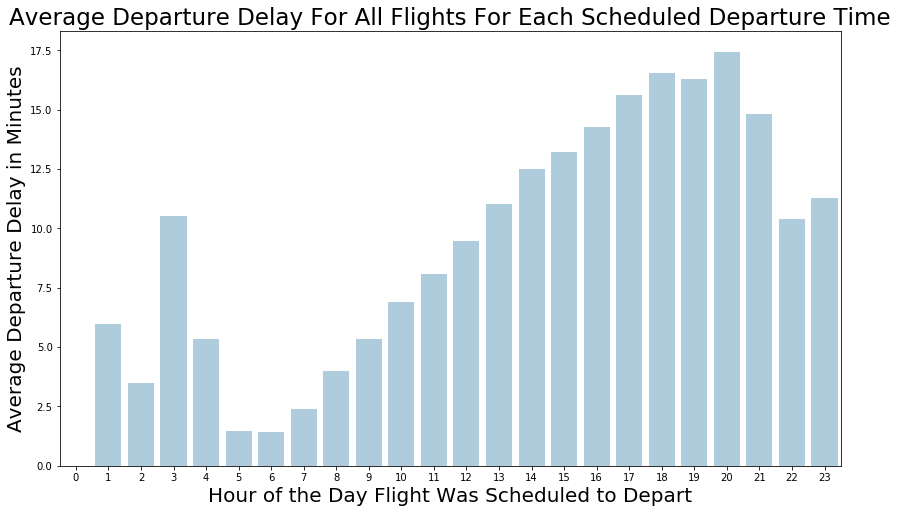

In [9]:
hour_order = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14',
             '15','16','17','18','19','20','21','22','23']
fig = plt.gcf();
fig.set_size_inches(14, 8);
base_color = sb.color_palette()[0];
sb.barplot(data = flights, x = 'CRSDepTime', y= 'DepDelay', color = base_color, order = hour_order, ci=None);
plt.ylabel('Average Departure Delay in Minutes', fontsize = 20);
plt.xlabel('Hour of the Day Flight Was Scheduled to Depart', fontsize = 20);
plt.title('Average Departure Delay For All Flights For Each Scheduled Departure Time', fontsize = 23);

In [12]:
#Convert CRSDepTime to String then splice off minutes to get hour of scheduled flight for the top_airlines dataframe
top_airlines['CRSDepTime'] = top_airlines['CRSDepTime'].astype(str)
top_airlines.CRSDepTime = top_airlines.CRSDepTime.str[:-2]

In [13]:
#Drop rows that have a null value
top_airlines = top_airlines[flights['CRSDepTime'].notnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Average Departure Delay by Weekday for All Flights

The top 5 busiest airlines follow a similar trend as all flights in that the average departure delay gradually increases as it gets later in the day.

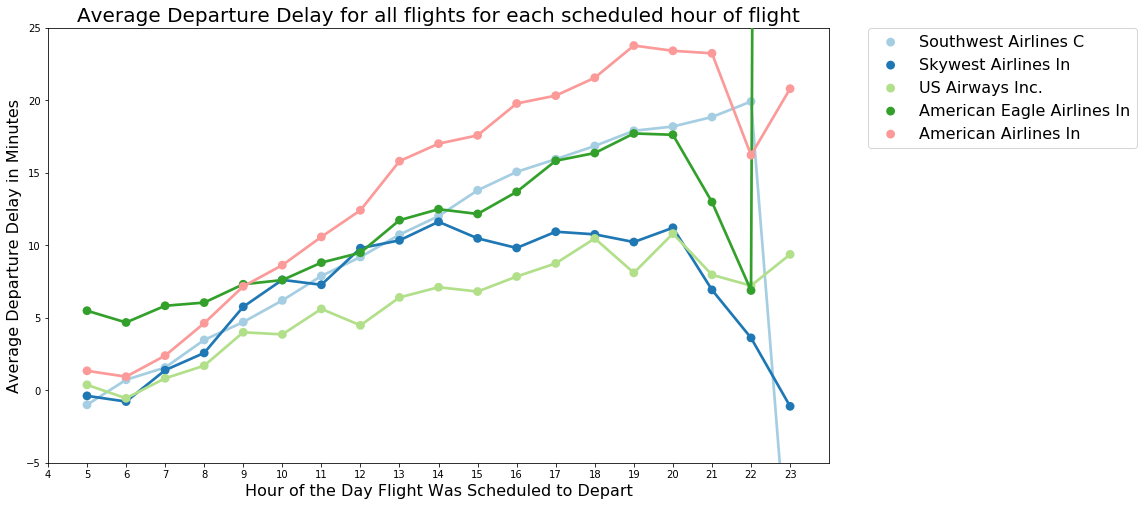

In [34]:
fig = plt.gcf();
fig.set_size_inches(14, 8);
sb.set_palette(sb.color_palette("Paired", 5));
sb.pointplot(data = top_airlines, x = 'CRSDepTime', y= 'DepDelay', order = hour_order, hue='Airline', ci=None);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16);
plt.ylim(-5, 25);
plt.xlim(4, 24);
plt.ylabel('Average Departure Delay in Minutes', fontsize = 16);
plt.xlabel('Hour of the Day Flight Was Scheduled to Depart', fontsize = 16);
plt.title('Average Departure Delay for all flights for each scheduled hour of flight', fontsize = 20);